# eQTL-GWAS Comparison Analysis

This notebook compares eQTL signals from three muscle tissues (Quad, VM, SMA) with unadjusted self-reported walking pace GWAS data (as a proximate for gait speed).

**Workflow:**
1. **Data Extraction** - Extract GWAS and eQTL data for genomic regions defined as ±500 kb around the midpoint (mean of start and end positions) of the top variants regulating each gene. 
2. **Save to RDS** - Store extracted data for reuse
3. **Load from RDS** - Load previously extracted data
4. **Visualization** - Create publication-ready multi-panel plots

# Results
1. NPC1 showed perfect colocalization between GWAS and eQTL signals across all three tissues (Quad, VH, and SMA).
2. SLC38A3 exhibited colocalization between GWAS and fine-mapping signals in the DLPFC; however, the GWAS hits showed slight positional offsets relative to the VH and SMA eQTL signals, which might be due to LD. 
* There's no Quad eQTL available for this gene. But I hasn't found the phenotype data for a check.
* Colocalization was determined by visual inspection.

## Setup

In [1]:
source("./eQTL_GWAS_functions.R")

eQTL-GWAS comparison functions loaded successfully!



In [2]:
# Gene name mapping table
# Source: Ensembl, NCBI, Human Protein Atlas, Bgee
gene_name_map <- c(
  "ENSG00000141458" = "NPC1",      # Chromosome 18
  "ENSG00000148572" = "NRBF2",     # Chromosome 10
  "ENSG00000188338" = "SLC38A3",   # Chromosome 3
  "ENSG00000177548" = "RABEP2"     # Chromosome 16
)

# Display the mapping
cat("Gene Name Mapping:\n")
for (ensg in names(gene_name_map)) {
  cat(sprintf("  %s -> %s\n", ensg, gene_name_map[ensg]))
}

Gene Name Mapping:
  ENSG00000141458 -> NPC1
  ENSG00000148572 -> NRBF2
  ENSG00000188338 -> SLC38A3
  ENSG00000177548 -> RABEP2


## Visualization


Figure saved to: ./ENSG00000141458_multi_panel.pdf

Dimensions: 12.0 x 10.0 inches



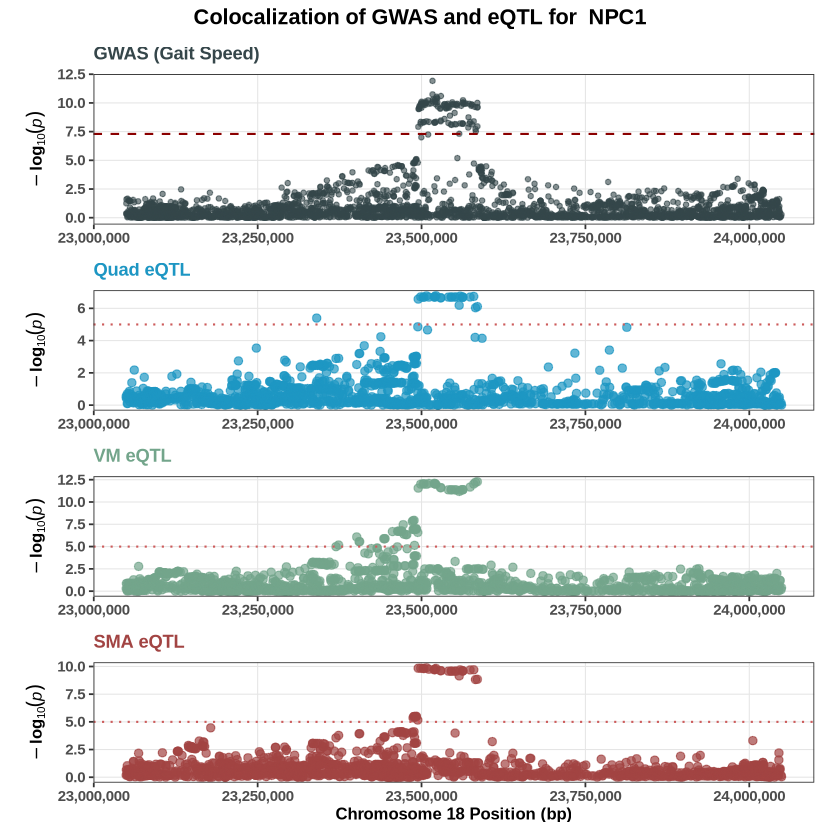

In [3]:
# Example: Plot with gene name in title
data <- readRDS("./data/ENSG00000141458.rds")

p_with_gene_name <- plot_extracted_data(
    data,
    panel_heights = c(1, 0.8, 0.8, 0.8),
    total_width = 12,
    total_height = 10,
    gene_name_map = gene_name_map,  # Use gene name mapping
    save_path = "./ENSG00000141458_multi_panel.pdf"
)

print(p_with_gene_name)


Figure saved to: ./ENSG00000148572_multi_panel.pdf

Dimensions: 12.0 x 10.0 inches



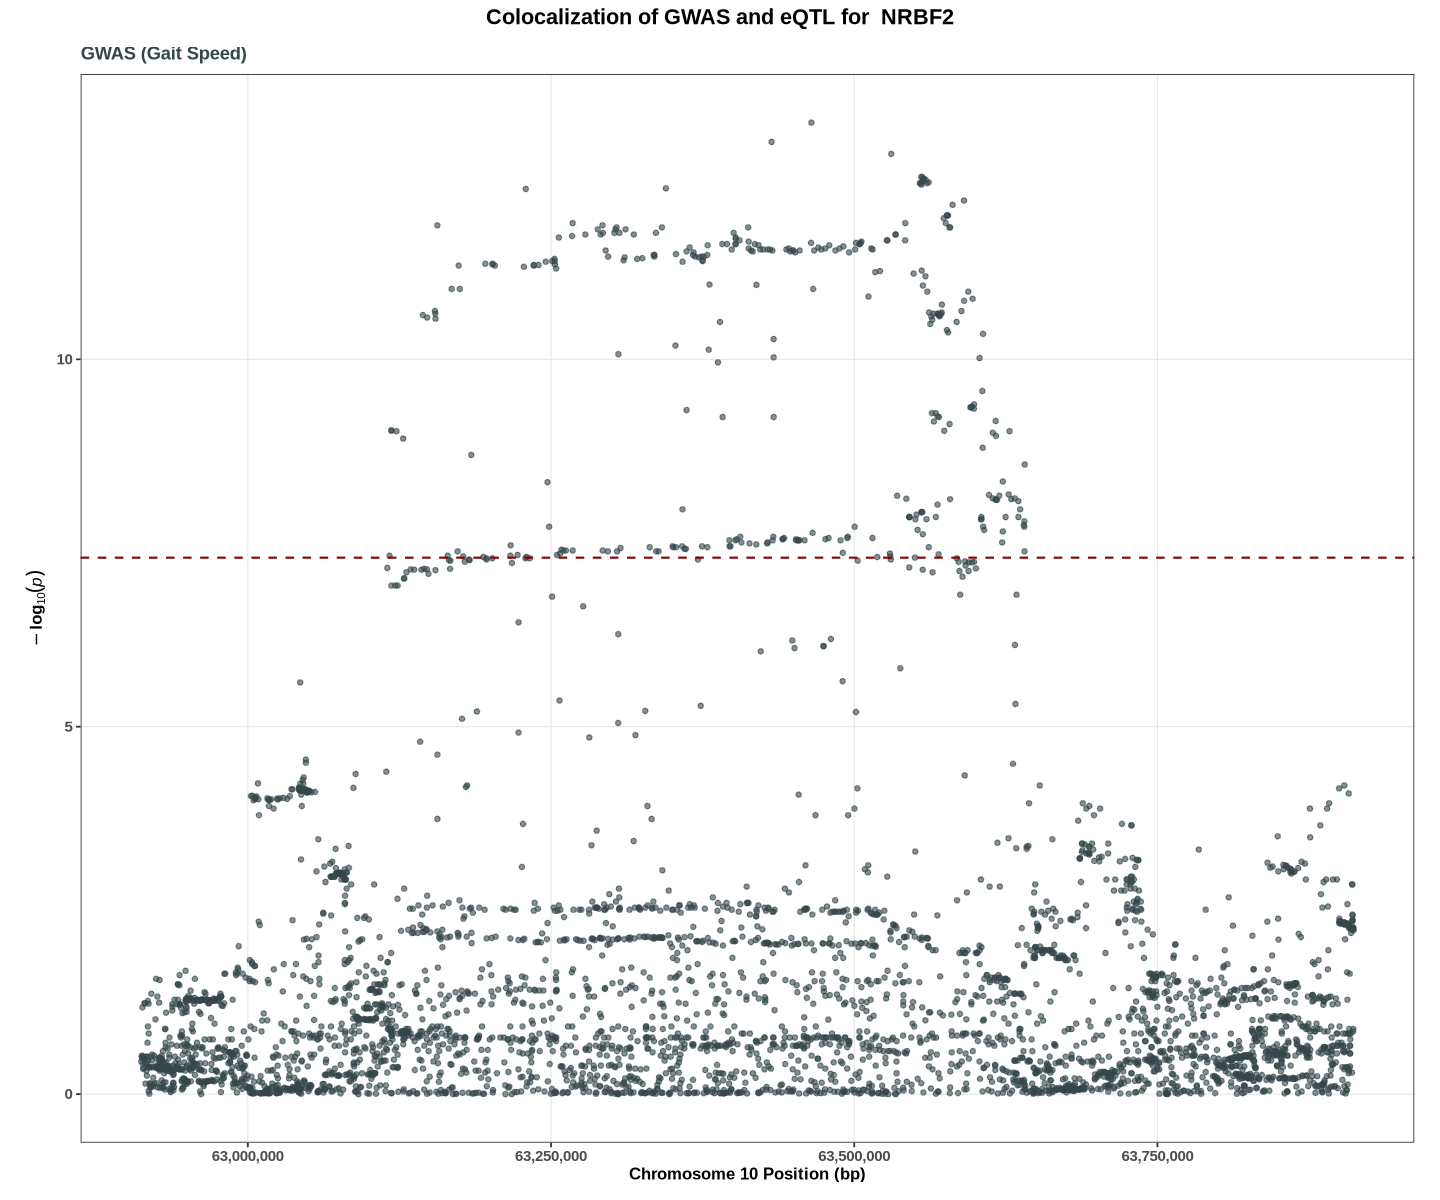

In [33]:
# Example: Plot with gene name in title
data <- readRDS("./data/ENSG00000148572.rds")

p_with_gene_name <- plot_extracted_data(
    data,
    panel_heights = c(1, 0.8, 0.8, 0.8),
    total_width = 12,
    total_height = 10,
    gene_name_map = gene_name_map,  # Use gene name mapping
    save_path = "./ENSG00000148572_multi_panel.pdf"
)

print(p_with_gene_name)


Figure saved to: ./ENSG00000188338_multi_panel.pdf

Dimensions: 12.0 x 10.0 inches



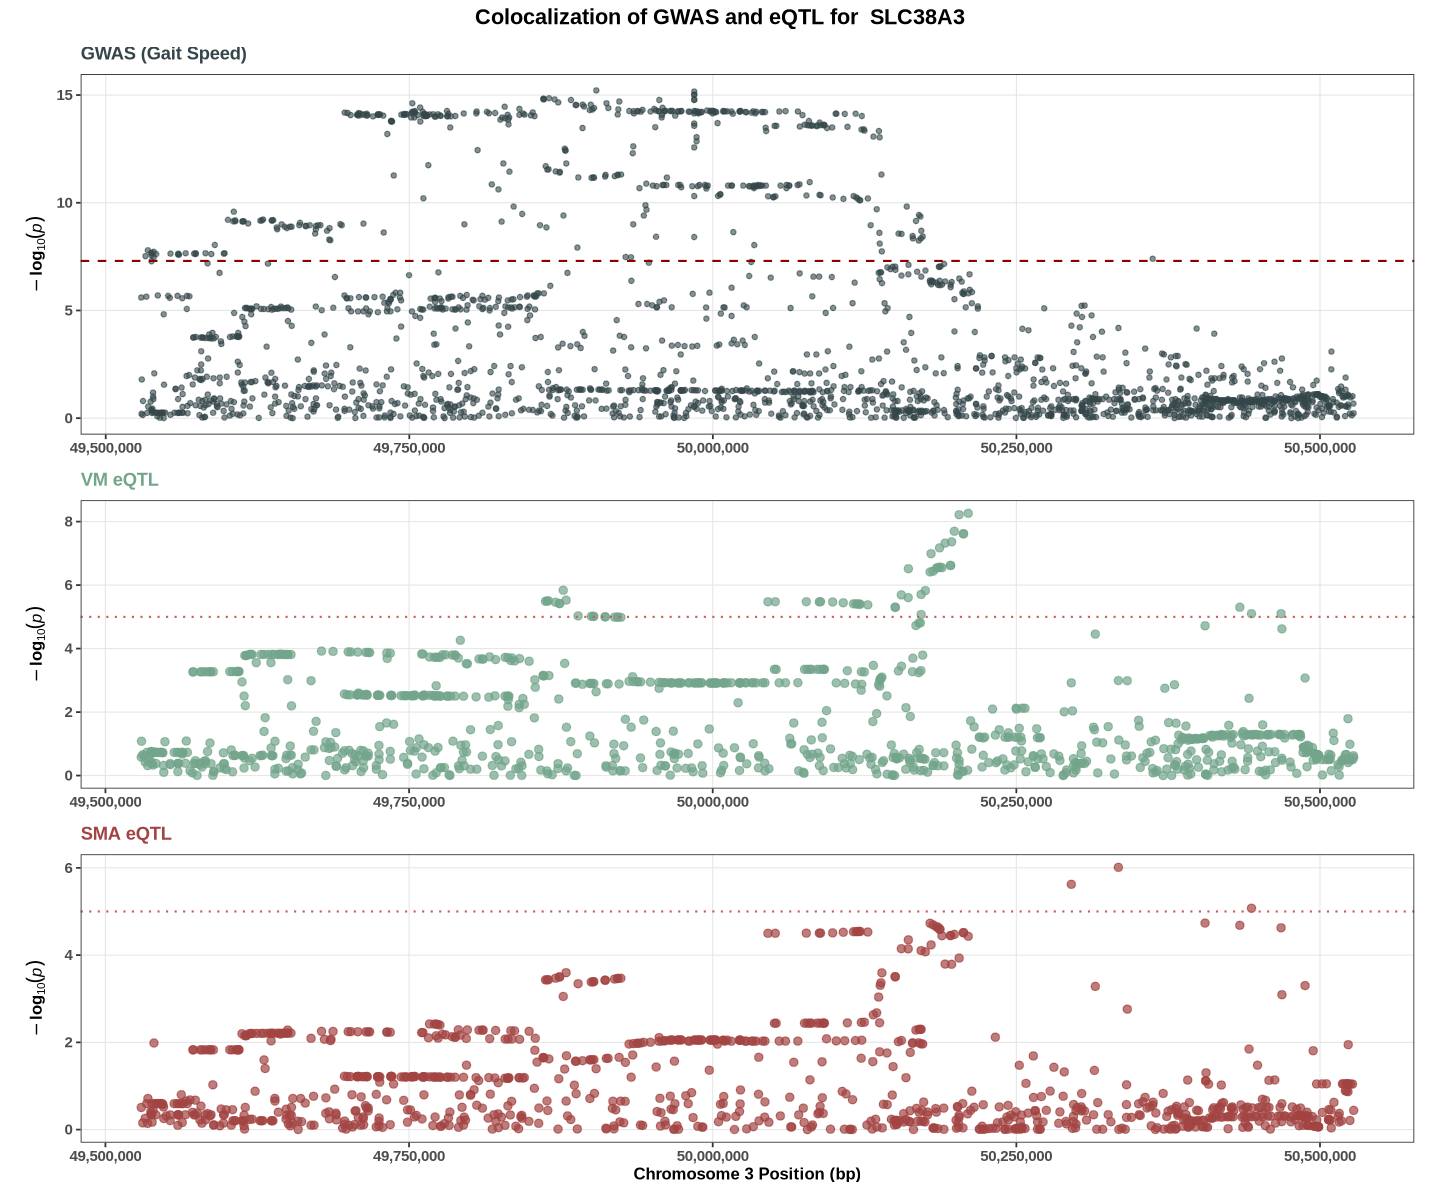

In [34]:
# Example: Plot with gene name in title
data <- readRDS("./data/ENSG00000188338.rds")

p_with_gene_name <- plot_extracted_data(
    data,
    panel_heights = c(1, 0.8, 0.8, 0.8),
    total_width = 12,
    total_height = 10,
    gene_name_map = gene_name_map,  # Use gene name mapping
    save_path = "./ENSG00000188338_multi_panel.pdf"
)

print(p_with_gene_name)

## Extract and Save Data for Multiple Genes

Process multiple genes and save each to a separate RDS file.

In [9]:
top_loci = fread("DLPFC_DeJager_eQTL.exported.toploci.bed.gz")
gene_list = c("ENSG00000141458", "ENSG00000148572", "ENSG00000188338", "ENSG00000177548")
gene_info = top_loci |> filter(gene_ID %in% gene_list) |> group_by(gene_ID, `#chr`) |> summarize(center_pos = mean(start+end)/2)
gene_info

`summarise()` has grouped output by 'gene_ID'. You can override using the
`.groups` argument.


gene_ID,#chr,center_pos
<chr>,<int>,<dbl>
ENSG00000141458,18,23549306
ENSG00000148572,10,63412051
ENSG00000188338,3,50028685


In [15]:

    
    for (i in 1:nrow(gene_info)) {
        gene_id <- gene_info$gene_ID[i]
        center <- gene_info$center_pos[i]
        chrom <- gene_info$`#chr`[i]
        cat(sprintf("\n=== Processing %s ===\n", gene_id))
        
        # Extract data
        gene_data <- extract_region_data(
            chromosome = chrom,
            center_pos = center,
            window_size = 1000000,
            gene_id = gene_id,
            tissues = c("Quad", "VM", "SMA")
        )
        
        # Save to RDS
        rds_path <- paste0("./data/",gene_id,".rds")
        save_extracted_data(gene_data, rds_path)
    }
    
    cat("\n✓ All genes processed and saved!\n")


=== Processing ENSG00000141458 ===


Extracting data for Chr18: 23,049,305 - 24,049,305

  Loading GWAS data...

    Found 3,100 variants

  Loading Quad eQTL data...

    Found 1,594 variant-gene pairs

  Loading VM eQTL data...

    Found 1,646 variant-gene pairs

  Loading SMA eQTL data...

    Found 1,630 variant-gene pairs


Data extraction complete!

Data saved to: ./data/ENSG00000141458.rds

  GWAS variants: 3,100

  Quad eQTL: 1,594 pairs

  VM eQTL: 1,646 pairs

  SMA eQTL: 1,630 pairs




=== Processing ENSG00000148572 ===


Extracting data for Chr10: 62,912,051 - 63,912,051

  Loading GWAS data...

    Found 4,218 variants

  Loading Quad eQTL data...

No eQTL files found for Quad, chromosome 10

    No data found

  Loading VM eQTL data...

No eQTL files found for VM, chromosome 10

    No data found

  Loading SMA eQTL data...

No eQTL files found for SMA, chromosome 10

    No data found


Data extraction complete!

Data saved to: ./data/ENSG00000148572.rds

  GWAS variants: 4,218




=== Processing ENSG00000188338 ===


Extracting data for Chr3: 49,528,685 - 50,528,685

  Loading GWAS data...

    Found 2,196 variants

  Loading Quad eQTL data...

    No data found

  Loading VM eQTL data...

    Found 980 variant-gene pairs

  Loading SMA eQTL data...

    Found 961 variant-gene pairs


Data extraction complete!

Data saved to: ./data/ENSG00000188338.rds

  GWAS variants: 2,196

  VM eQTL: 980 pairs

  SMA eQTL: 961 pairs




✓ All genes processed and saved!


## Extract Data Without Gene Filter (Region-Based)

You can also extract data for a region without filtering by gene.

In [35]:
# Extract data for a region (all genes in the region)
region_data <- extract_region_data(
    chromosome = 18,
    center_pos = 10500000,
    window_size = 1000000,  # 1 Mb window
    gene_id = NULL,  # No gene filter - get all genes in region
    tissues = c("Quad", "VM", "SMA")
)

# Save
save_extracted_data(region_data, "./data/chr18_10-11Mb_region.rds")

Extracting data for Chr18: 10,000,000 - 11,000,000

  Loading GWAS data...

    Found 5,089 variants

  Loading Quad eQTL data...

    Found 12,879 variant-gene pairs

  Loading VM eQTL data...



In [ ]:
# Plot the region
p_region <- plot_extracted_data(
    region_data,
    panel_heights = c(1, 0.8, 0.8, 0.8),
    total_width = 12,
    total_height = 10
)

print(p_region)

## Summary of Key Functions

### Data Extraction:
1. **`extract_region_data(chromosome, center_pos, window_size, gene_id, tissues)`**
   - Extracts GWAS and eQTL data for a genomic region
   - Returns a list with: `gwas`, `eqtl`, `metadata`

2. **`save_extracted_data(data_list, file_path)`**
   - Saves extracted data to RDS file
   
3. **`readRDS(file_path)`**
   - Loads previously saved data from RDS file

### Visualization:
4. **`plot_extracted_data(data_list, panel_heights, total_width, total_height, ...)`**
   - Creates multi-panel plot from extracted data
   - Each tissue gets its own panel
   - Adjustable panel heights

### Helper Functions:
5. **`find_genes_on_chromosome(chromosome)`**
   - Find all genes with eQTL data on a chromosome
   
6. **`check_gene_tissues(gene_id, chromosome)`**
   - Check which tissues have data for a specific gene

### Workflow:
```r
# 1. Extract data
data <- extract_region_data(chromosome = 3, center_pos = 50000000, 
                            window_size = 1000000, gene_id = "ENSG00000188338")

# 2. Save to RDS
save_extracted_data(data, "./data/my_gene.rds")

# 3. Later: Load from RDS
data <- readRDS("./data/my_gene.rds")

# 4. Visualize
plot <- plot_extracted_data(data, panel_heights = c(1, 0.8, 0.8, 0.8))
```